# Making models with pipes_vis
pipes_vis is a simple plotting/GUI visualizer that takes a defined galaxy SFH and some parameters and turn it into a predicted observed spectrum at a given redshift, based on BAGPIPES' model generation features. The main feature is an interactive GUI that allows for real-time update of the spectrum whenever parameters of the galaxy are changed, allowing easy visualization of each varying parameter's effect on the predicted spectrum.<br>

pipes_vis is designed to be very similar to BAGPIPES' input dictionaries. This example displays the basics on interacting with the package.

## Define an initial components dictionary
All avaliable components and their meanings are given at the end of this example.<br>
Note: due to the redshift-invariant nature of these defined SFHs, all parameters that concern specific points in time are in age of the universe (Gyr), unlike some of BAGPIPES' ones that are in lookback time. <br>
pipes_vis version used here: `0.4.4` <br>
bagpipes version used here: `1.1.2` <br>

In [1]:
import pipes_vis as v

Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
If bagpipes is complaining about a missing installation of multinest and/or pymultinest, it means you will not be able to use the fitting half of bagpipes. But that will not affect the usage of pipes_vis. However, if you do intend to use bagpipes for SED fitting, do follow the relevent instructions to install the required packages.


In [2]:
# Define initial parameters, very much in Bagpipes style

delayed = {}
delayed["massformed"] = 10.5                 # total log_10(M*/M_sun) of the galaxy, for the whole SFH
delayed["metallicity"] = 1.0                 # assumed constant metallicity, in number of times of Z_sun
delayed["tform"] = 3                         # age of universe when the population formed, Gyr
delayed["tau"] = 2                           # SFR decay timescale of the population, Gyr

init_components = {}
init_components["redshift"] = 0.04           # redshift at observation
init_components["delayed"] = delayed 
init_components["spec_lim"] = [3000,10000]   # wavelength boundaries of the main spectrum panel

simple_vis = v.visualizer(init_components)

# Static plot without GUI
Static plot without interactiveness, using parameters set in the given component dictionary. <br>
I thought some might want to take the plots in static form and do something with them, so this function only returns the plain plots without any sliders or textboxes.

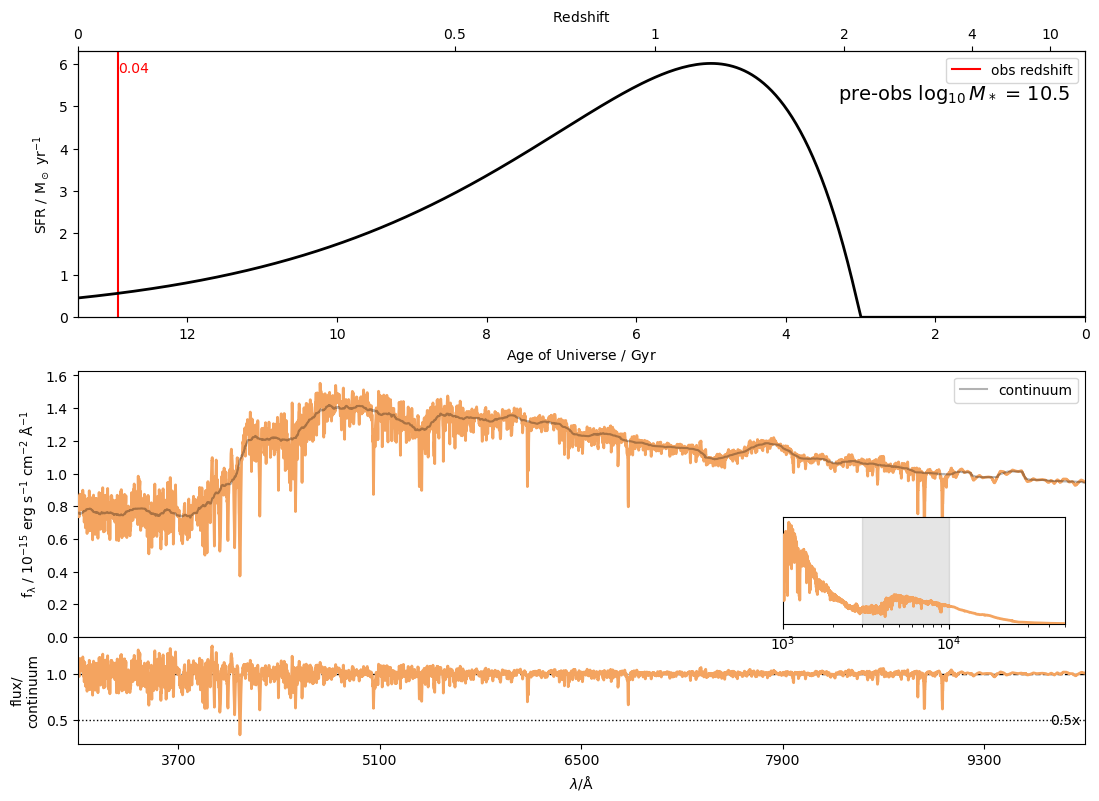

In [3]:
%matplotlib inline
fig, axes = simple_vis.static_plot()

## The GUI
Interactive GUI with sliders and textboxes controlling the galaxy parameters, and the plots update as sliders/textboxes change. <br>
The checkbox "additional plots" currently only includes plotting the modelled stellar metallicity evolution on top of the SFH. For constant metallicity models (the default), it will just be an uninteresting horizontal line. pipes_vis include support for a few time-varying metallicity models, but they are not (yet?) in Bagpipes itself. <br>
`%matplotlib inline` will only display the plot inline without interactiveness. Change it to `%matplotlib qt` or `%matplotlib notebook`.

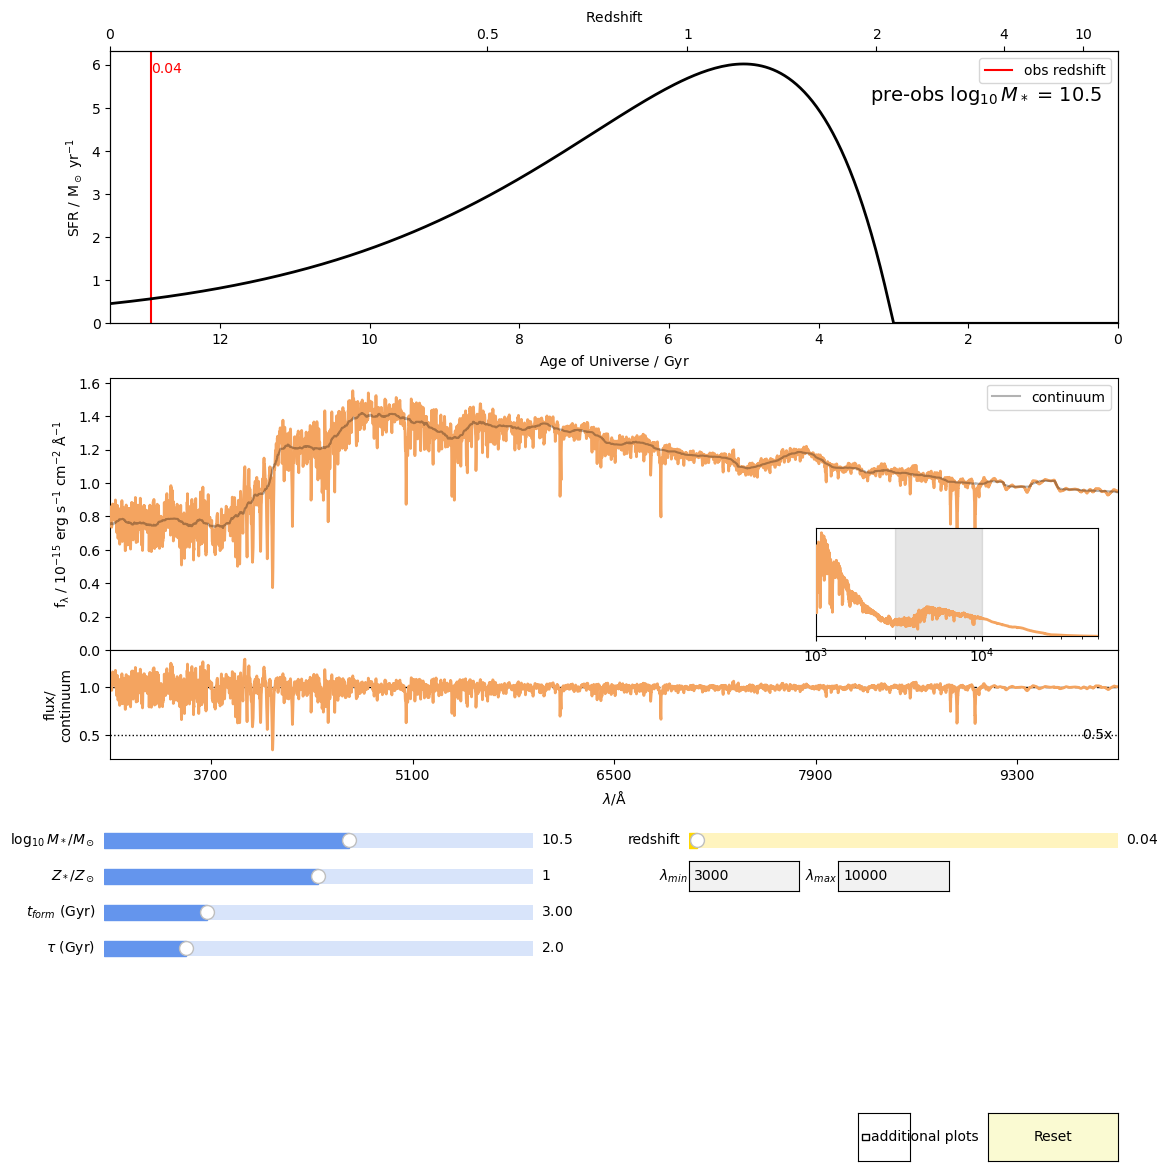

In [4]:
%matplotlib inline
simple_vis.GUI()

## More complex models
This package supports multiple combinations of SFHs at once, even ones of the same form. But don't get too carried away, cause the space for sliders for SFHs is limited!<br>

Also, by adding the key `something[param_lims] = [lower_lim, upper_lim]` along with the param, you can replace the default slider range for the parameters with custom ones. This example does it for redshift and psb2 massformed.

In [5]:
burst1 = {}
burst1["massformed"] = 9                     # total log_10(M*/M_sun) of the galaxy, for the whole SFH
burst1["metallicity"] = 1.0                  # assumed constant metallicity, in number of times of Z_sun
burst1["tform"] = 2                          # age of universe when the burst happened, Gyr

burst2 = {}                                  # a second burst
burst2["massformed"] = 8.8                   # total log_10(M*/M_sun) of the galaxy, for the whole SFH
burst2["metallicity"] = 1.0                  # assumed constant metallicity, in number of times of Z_sun
burst2["tform"] = 5                          # age of universe when the burst happened, Gyr

delayed = {}
delayed["massformed"] = 10.5                 # total log_10(M*/M_sun) of the galaxy, for the whole SFH
delayed["metallicity"] = 1.0                 # assumed constant metallicity, in number of times of Z_sun
delayed["tform"] = 6                         # age of universe when the population formed, Gyr
delayed["tau"] = 1                           # SFR decay timescale of the population, Gyr

psb_wild2020 = {}                            # 2-part PSB SFH, older=exponential, younger=double power law
psb_wild2020["massformed"] = 10              # total log_10(M*/M_sun) of the galaxy, for the whole SFH
psb_wild2020["metallicity"] = 1.0            # assumed constant metallicity, in number of times of Z_sun
psb_wild2020["massformed_lims"] = [7,15]
psb_wild2020["told"] = 4                     # age of universe when the older population formed, Gyr
psb_wild2020["tau"] = 1.                     # SFR decay timescale of the older population, Gyr
psb_wild2020["tburst"] = 12                  # age of universe when the starburst happened, Gyr
psb_wild2020["alpha"] = 100                  # decline steepness of the burst, index of double power law
psb_wild2020["beta"] = 100                   # incline steepness of the burst, index of double power law
psb_wild2020["fburst"] = 0.5                 # fraction of mass formed in the burst (vs the older population)

dust = {}                                    # dust attenuation and emission, implementation identical to bagpipes
dust["type"] = "CF00"                        # Charlot & Fall (2001)
dust["eta"] = 2.0                            # additional scaling factor for dust in birth clouds (1/mu)
dust["Av"] = 1.0                             # extinction in V band (5500AA)
dust["n"] = 0.7                              # slope of the attenuation law

nebular = {}                                 # nebular emission, implementation identical to bagpipes
nebular["logU"] = -3                         # Log_10 of the ionization parameter.

init_components = {}
init_components["redshift"] = 0.04           # redshift at observation
init_components["redshift_lims"] = [0,10]
init_components["burst1"] = burst1
init_components["burst2"] = burst2
init_components["delayed"] = delayed
init_components["psb_wild2020"] = psb_wild2020
init_components["dust"] = dust
init_components["nebular"] = nebular
init_components["t_bc"] = 0.01               # duration that the birth clouds hang around, Gyr
init_components["veldisp"] = 0               # velocity dispersion, km/s
init_components["spec_lim"] = [3000,10000]   # wavelength boundaries of the main spectrum panel

complex_vis = v.visualizer(init_components)

You can actually change some of the plotting properties in between initializing the visualizer object and actually plotting. See the `__init__` function of the visualizer object for the full list of these properties.

/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


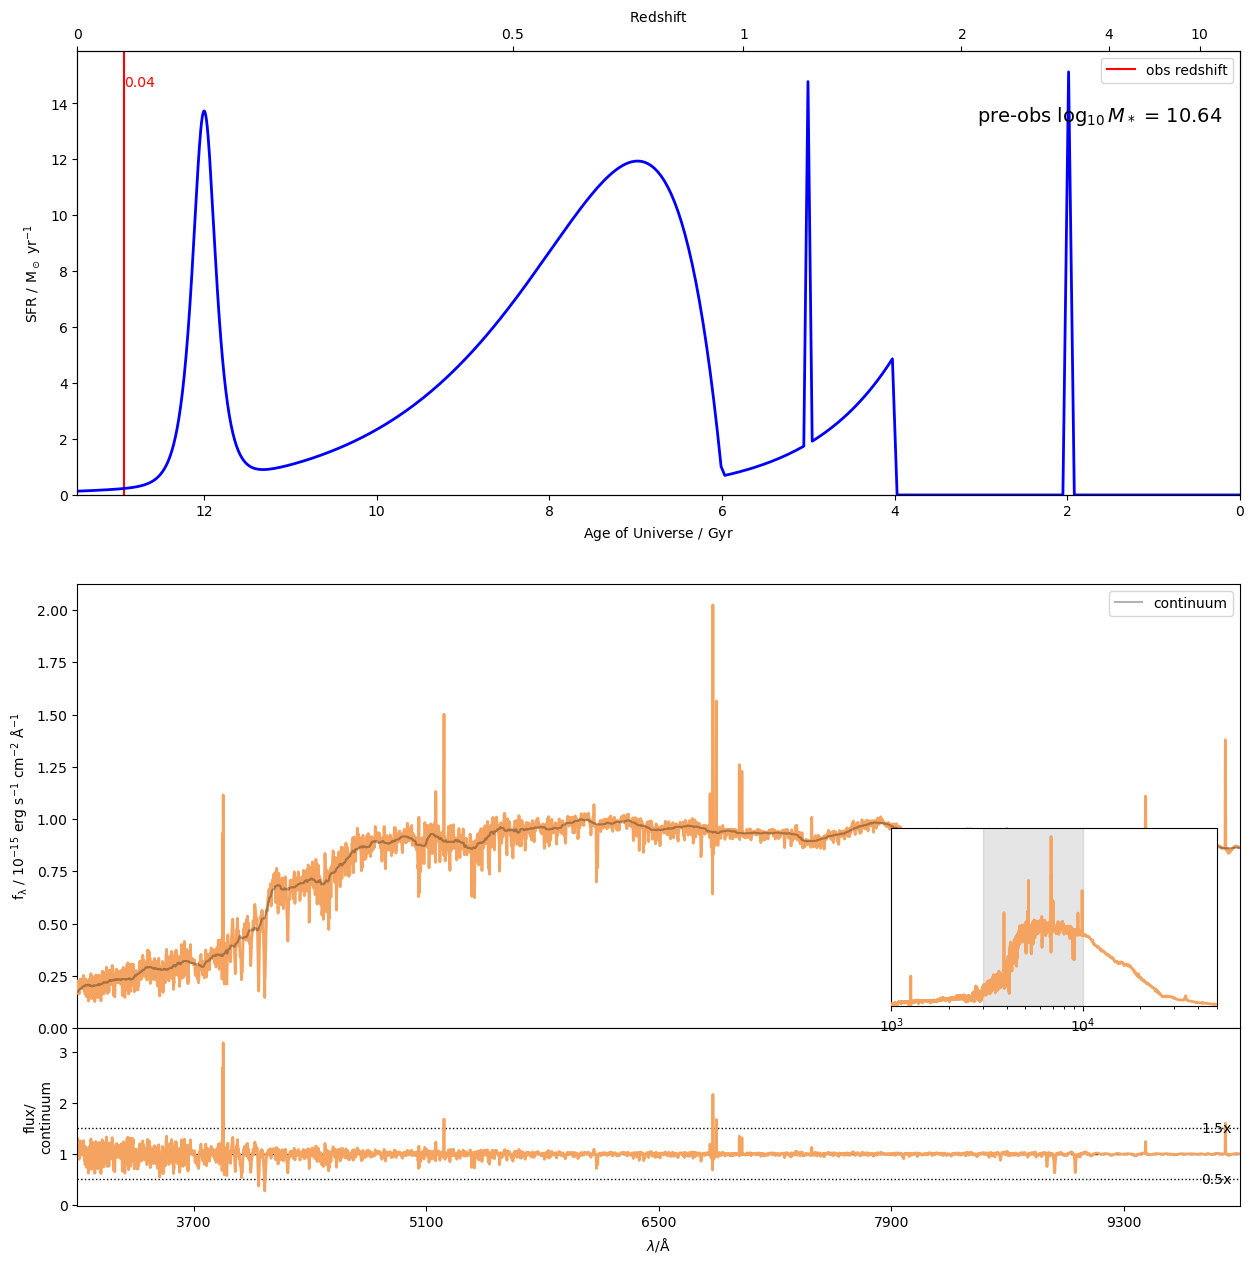

In [6]:
%matplotlib inline
# width of spectrum (in AA) considered when calculating running median continuum
complex_vis.median_width = 100
# colours used for the various plot lines
complex_vis.plot_colors = {'sfh':"blue", 'z':"red", 'spectrum':"sandybrown", 
                           'continuum':"black", 'zoom':"black"}
fig, axes = complex_vis.static_plot(figsize=(15,15))

/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


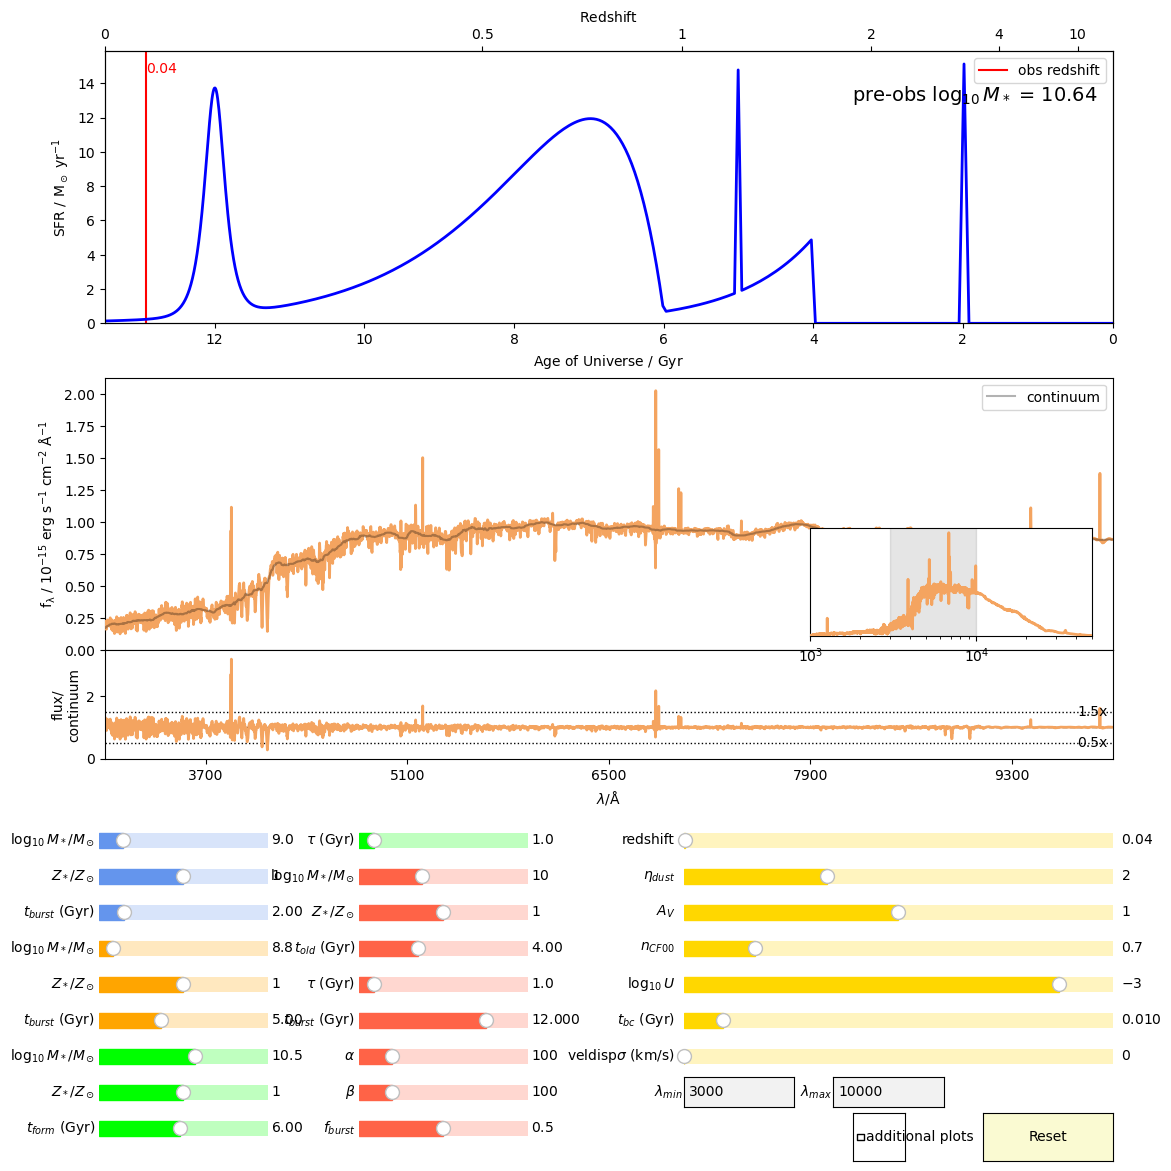

In [7]:
%matplotlib inline
# again, remember to change the above line to qt or notebook to get interactiveness
complex_vis.GUI()

If you want to see the effects of one parameter on the spectra, assuming fixed values for everything else as specified in the `init_components` dictionary, you can use the `ribbon_plot`.

/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


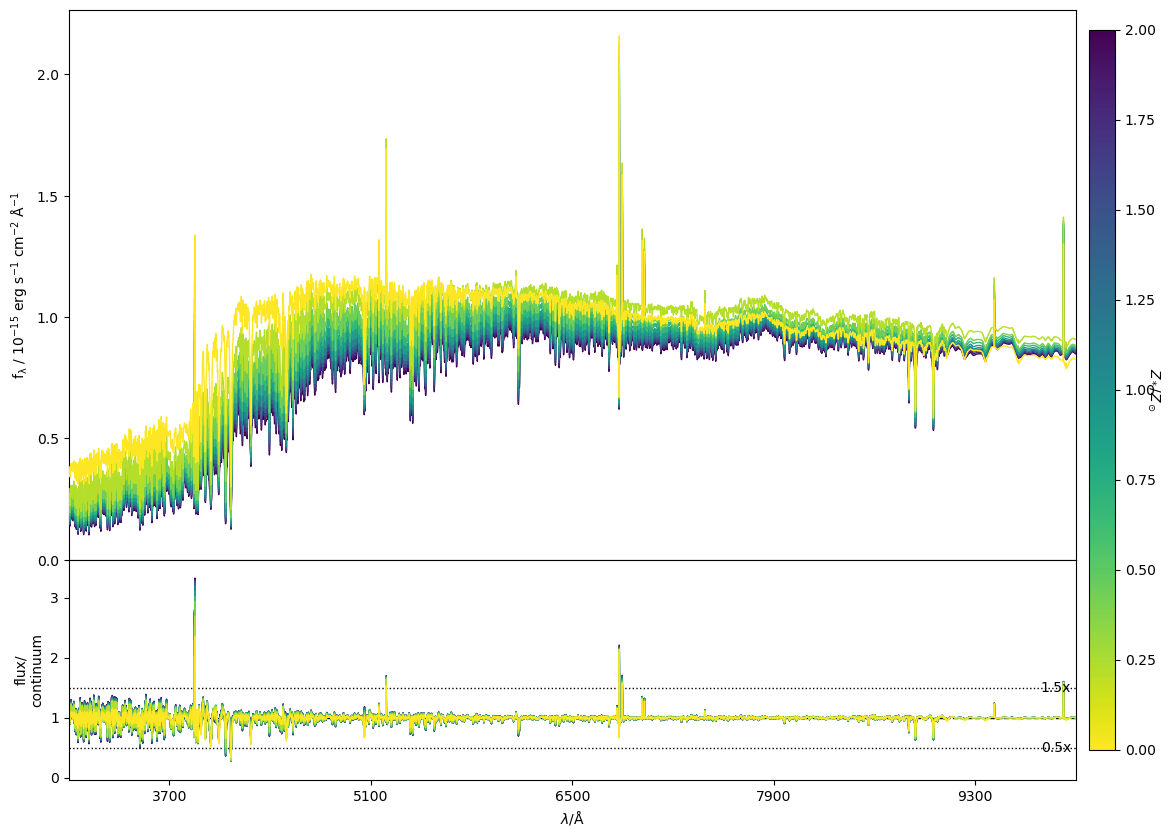

In [8]:
fig, ax = complex_vis.ribbon_plot('psb_wild2020:metallicity', reverse=True)

## Adding spectral indices
You can also throw in defined spectral indices on the side. First, define the indices following the style in Bagpipes:

In [13]:
import numpy as np

def mgfe_prime_function(values, errs=None):
    value = np.sqrt(values[0]*(0.72*values[1] + 0.28*values[2]))

    if errs is not None:
        partials = np.zeros(3)

        partials[0] = (0.36*values[1] + 0.14*values[2])
        partials[1] = 0.36*values[0]
        partials[2] = 0.14*values[0]

        partials /= np.sqrt(0.72*values[0]*values[1] + 0.28*values[0]*values[2])

        err = np.sqrt(np.sum(partials**2*errs**2))

        return value, err

    return value

d4 = {}
d4["name"] = "Dn4000"
d4["type"] = "break"
d4["continuum"] = [[3850., 3950.], [4000., 4100.]]     # blue continuum first, values in anstroms

hb = {}
hb["name"] = "Hbeta"
hb["type"] = "EW"
hb["unit"] = "AA"
hb["continuum"] = [[4827.875, 4847.875], [4876.625, 4891.625]]
hb["feature"] = [4847.875, 4876.625]

mgb = {}
mgb["name"] = "Mgb"
mgb["type"] = "EW"
mgb["unit"] = "AA"
mgb["feature"] = [5160.125, 5192.625]
mgb["continuum"] = [[5142.625, 5161.375], [5191.375, 5206.375]]

fe5270 = {}
fe5270["name"] = "Fe5270"
fe5270["type"] = "EW"
fe5270["unit"] = "AA"
fe5270["feature"] = [5245.650, 5285.650]
fe5270["continuum"] = [[5233.150, 5248.150], [5285.650, 5318.150]]

fe5335 = {}
fe5335["name"] = "Fe5335"
fe5335["type"] = "EW"
fe5335["unit"] = "AA"
fe5335["feature"] = [5312.125, 5352.125]
fe5335["continuum"] = [[5304.625, 5315.875], [5353.375, 5363.375]]

# composite index, from Thomas+2003, MNRAS, 339, 897
mgfe_prime = {}
mgfe_prime["name"] = "[MgFe]'"
mgfe_prime["type"] = "composite"
mgfe_prime["unit"] = "AA"
mgfe_prime["function"] = mgfe_prime_function
mgfe_prime["component1"] = mgb
mgfe_prime["component2"] = fe5270
mgfe_prime["component3"] = fe5335

ind_list = [d4, hb, mgfe_prime, mgb, fe5270]

Next, create a new visualizer object with the list of indices

In [14]:
# using the same set of init_components from complex_vis
index_vis = v.visualizer(init_components, index_list=ind_list)

The specified indices will then be added to the right of the other plots, and will also change. They adopt the same y-axis scales as the main spectrum panel

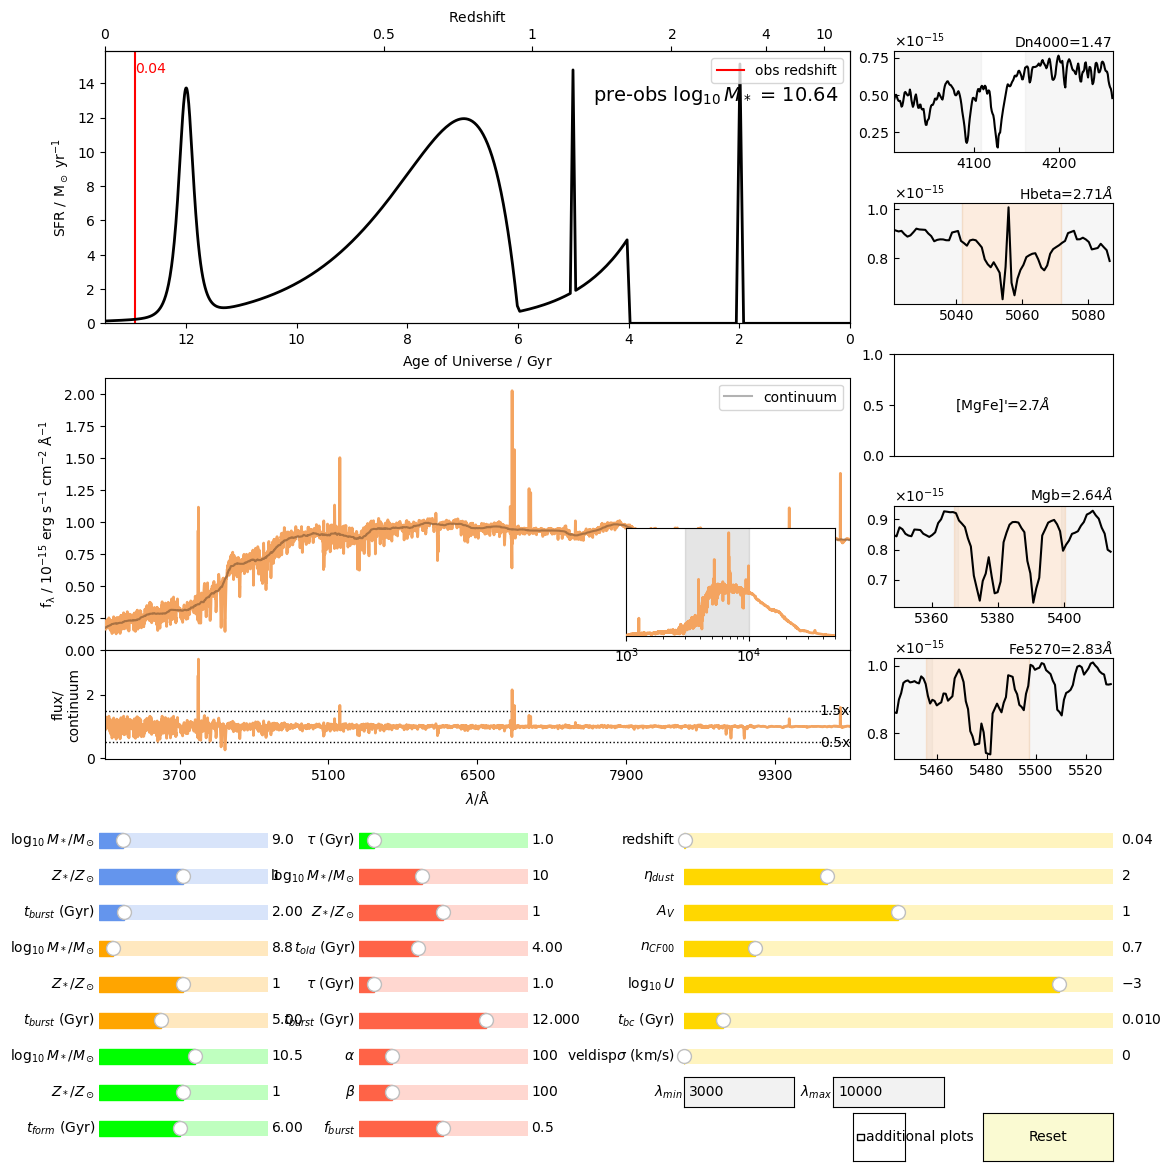

In [15]:
%matplotlib inline
# again, remember to change the above line to qt or notebook to get interactiveness
index_vis.GUI()

Or only plot the indices for larger panel sizes and (maybe) more responsive update times

/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/opt/miniconda3/envs/bagpipes_1.0/lib/python3.12/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass


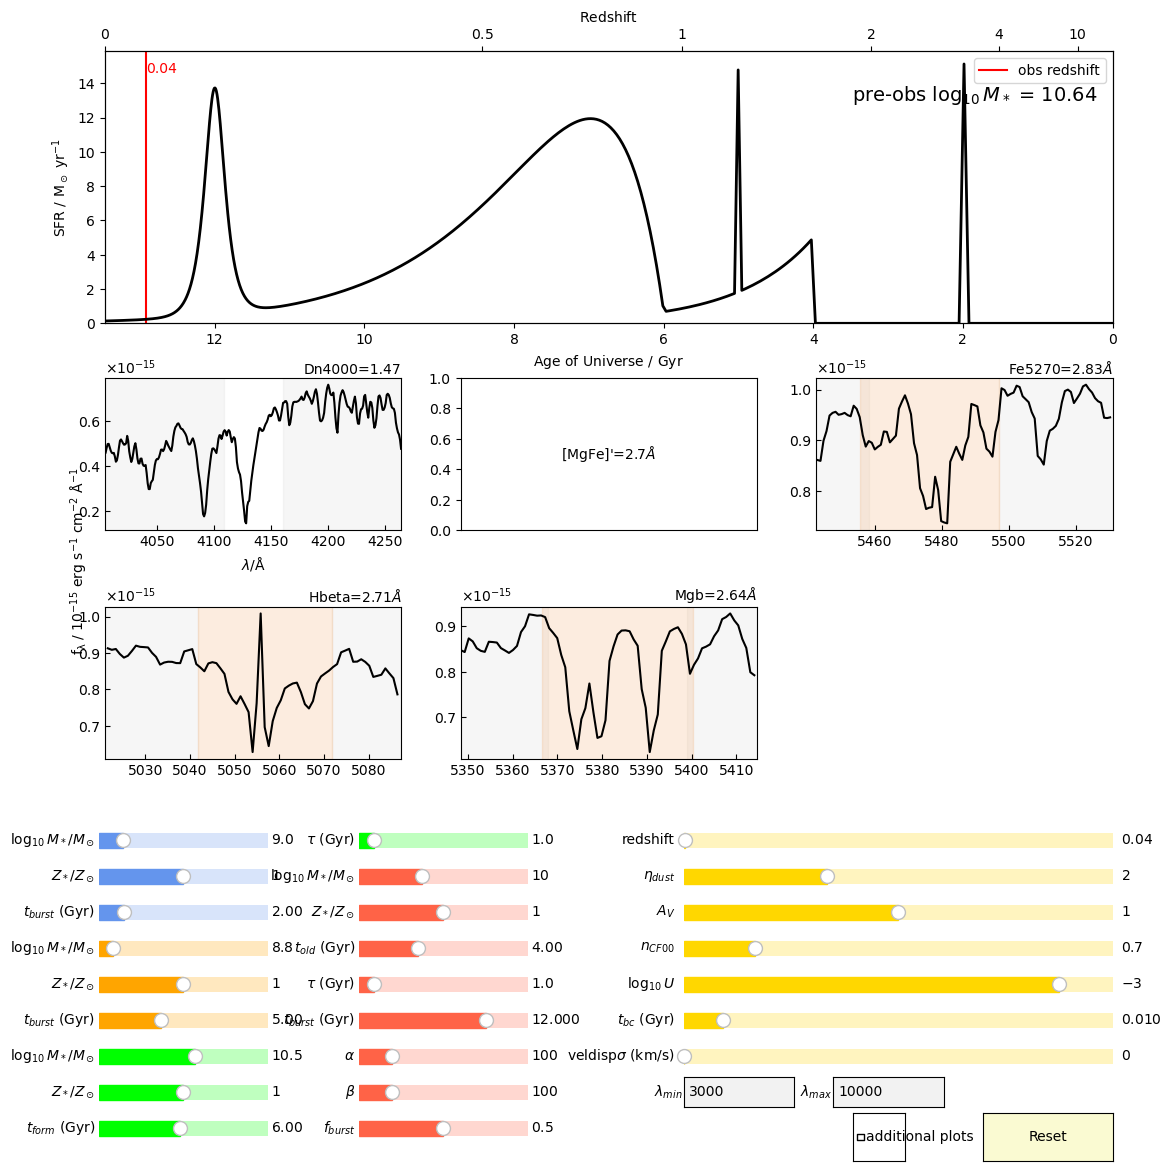

In [16]:
index_vis = v.visualizer(init_components, index_list=ind_list)
index_vis.GUI(index_only=True)

## A note about parameters in the input dictionary
Global parameters that are issued directly to the top level input dictionary are identical to those in BAGPIPES' model_components dictionary:

In [ ]:
# as taken from BAGPIPES documentation https://bagpipes.readthedocs.io/en/latest/model_components.html
init_components = {}
init_components["redshift"] = mandatory    # redshift at observation
init_components["t_bc"] = 0.01             # Max age of birth clouds: Gyr
init_components["veldisp"] = 0.            # Velocity dispersion: km/s

init_components["sfh_comp"] = sfh_comp     # Dict containing SFH info
init_components["dust"] = dust             # Dict containing dust info
init_components["nebular"] = dust          # Dict containing nebular emission info

init_components["spec_lim"] = [mandatory,mandatory] # wavelength boundaries of the main spectrum panel

As you might have noticed, the names of some of the parameters have changed for some SFH components. This is due to the redshift-invariant nature of these defined SFHs, where all parameters that concern specific times are in age of the universe (Gyr), while BAGPIPES' ones are in lookback time. All of the available options are listed below.

In [ ]:
# mandatory parameters for any SFH to be specified (also means these sliders will appear in the 
# GUI for any component):
sfh_comp = {}
sfh_comp["massformed"] = mandatory         # total log_10(M*/M_sun) of the galaxy, for the whole SFH
sfh_comp["metallicity"] = mandatory        # assumed constant metallicity, in number of times of Z_sun,
                                           # Z_sol = 0.02 

# now the list of components available:
burst = {}                                 # Delta function burst
burst["tform"] = mandatory                 # age of universe when the burst happened, Gyr
                                           # bagpipes["age"] = cosmo.age(0).value - vis["tform"]

constant = {}                              # tophat function
constant["tform"] = mandatory              # age of universe when switched on, Gyr
                                           # bagpipes["age_max"] = cosmo.age(0).value - vis["tform"]
constant["tend"] = mandatory               # age of universe when switched off: Gyr
                                           # bagpipes["age_min"] = cosmo.age(0).value - vis["tend"]

exponential = {}                           # Tau model e^-(t/tau)
exponential["tform"] = mandatory           # age of universe when the population formed, Gyr
                                           # bagpipes["age"] = cosmo.age(0).value - vis["tform"]
exponential["tau"] = mandatory             # Timescale of decrease: Gyr, same as bagpipes

delayed = {}                               # Delayed Tau model t*e^-(t/tau)
delayed["tform"] = mandatory               # age of universe when the population formed, Gyr
                                           # bagpipes["age"] = cosmo.age(0).value - vis["tform"]
delayed["tau"] = mandatory                 # Timescale of decrease: Gyr


lognormal = {}                             # lognormal SFH
lognormal["tmax"] = mandatory              # Age of Universe at peak SF: Gyr, same as bagpipes
lognormal["fwhm"] = mandatory              # Full width at half maximum SF: Gyr, same as bagpipes

dblplaw = {}                               # double-power-law
dblplaw["alpha"] = mandatory               # Falling slope index, same as bagpipes
dblplaw["beta"] = mandatory                # Rising slope index, same as bagpipes
dblplaw["tau"] = mandatory                 # Age of Universe at turnover: Gyr, same as bagpipes

psb_wild2020 = {}                          # 2-part PSB SFH, older=exponential, younger=double power law
psb_wild2020["told"] = mandatory           # age of universe when the older population formed, Gyr,
                                           # bagpipes["age"] = cosmo.age(0).value - vis["told"]
psb_wild2020["tau"] = mandatory            # SFR decay timescale of the older population, Gyr, same as bagpipes
psb_wild2020["tburst"] = mandatory         # age of universe when the starburst happened, Gyr,
                                           # bagpipes["burstage"] = cosmo.age(0).value - vis["tburst"]
psb_wild2020["alpha"] = mandatory          # decline steepness of the burst, index of dblplaw, same as bagpipes
psb_wild2020["beta"] = mandatory           # incline steepness of the burst, index of dblplaw, same as bagpipes
psb_wild2020["fburst"] = mandatory         # fraction of mass formed in the burst, same as bagpipes

# iyer and custom are not available, since they are much too complicated to implement with sliders

In [ ]:
# dust and nebular parts are done identically as bagpipes:
dust = {}
dust["type"] = mandatory   # Attenuation law: "Calzetti", "Cardelli", "CF00" or "Salim"
dust["Av"] = mandatory     # Absolute attenuation in the V band: magnitudes
dust["eta"] = 1.           # Multiplicative factor on Av for stars in birth clouds

dust["n"] = 1.             # Power-law slope of attenuation law ("CF00" type only)

dust["delta"] = 0.         # Deviation from Calzetti slope ("Salim" type only)
dust["B"] = 0.             # 2175A bump strength ("Salim" type only)

# Dust emission parameters
dust["qpah"] = 2.          # PAH mass fraction
dust["umin"] = 1.          # Lower limit of starlight intensity distribution
dust["gamma"] = 0.01       # Fraction of stars at umin

nebular = {}
nebular["logU"] = mandatory          # Log_10 of the ionization parameter.